<a href="https://colab.research.google.com/github/Mangeshdeore/EDA-on-US-Car-dataset/blob/main/EDA_for_car_detaset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Geely Auto, a Chinese automobile manufacturer, wants to enter the US market by establishing a manufacturing facility there and producing cars locally to start competing with its US and European rivals. To fully understand the variables that affect car pricing, they have hired a consulting firm for the automotive industry. They want to know specifically what influences car prices on the American market because those may differ greatly from those on the Chinese market. The company is curious about:
What elements are crucial for estimating the cost of a car? How accurately those factors capture the cost of a car The consulting company has amassed a sizable data set of various car models available on the American market based on numerous market surveys.

# Bussiness Goal

With the available independent variables, we must model the cost of automobiles. The management will use it to comprehend the precise relationship between price variation and independent variables. In order to maintain a set price, they can adjust the car's design, the company's business plan, etc. The model will also help management better understand how prices change in a new market.

# This Notebook will cover the following -

1. Data cleaning

2. Exploratory Data Analysis

3. Feature selection using Recursive Feature elimination(RFE)

4. Data Modelling and evaluation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 1. Data cleaning

In [ ]:
data=pd.read_csv('E:\Data Science Projects\CarPrice_Assignment.csv')

In [ ]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Drop car Id

In [ ]:
data=data.drop(['car_ID'],axis=1)

In [ ]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.shape

(205, 25)

In [ ]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
data['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

# Handling duplicate values in car name

1)nissan and Nissan are same                                                                                               
2)toyota and toyouta are same                                                                                         
3)vokswagen , volkswagen and vw are same                                                                                  
4)mazda and maxda are same                                                                                                
5)porcshce and porsche are same                                                                                          

In [ ]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
data['symboling']=data['symboling'].astype('str')

In [ ]:
data.info

<bound method DataFrame.info of     symboling                   CarName fueltype aspiration doornumber  \
0           3        alfa-romero giulia      gas        std        two   
1           3       alfa-romero stelvio      gas        std        two   
2           1  alfa-romero Quadrifoglio      gas        std        two   
3           2               audi 100 ls      gas        std       four   
4           2                audi 100ls      gas        std       four   
..        ...                       ...      ...        ...        ...   
200        -1           volvo 145e (sw)      gas        std       four   
201        -1               volvo 144ea      gas      turbo       four   
202        -1               volvo 244dl      gas        std       four   
203        -1                 volvo 246   diesel      turbo       four   
204        -1               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0    c

In [ ]:
data.dtypes

symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Categorical columns

In [ ]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [ ]:
data[categorical_cols].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Numerical columns

In [ ]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [ ]:
data[numerical_cols].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# 2. Exploratory Data Analysis

In [ ]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Visualise different car names

In [ ]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Fuel type Ratio

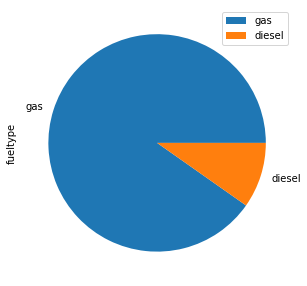

In [ ]:
df=pd.DataFrame(data['fueltype'].value_counts())
plot = df.plot.pie(y='fueltype', figsize=(5, 5))

* Most of the car has gas fuel

# Price distribution of cars

C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

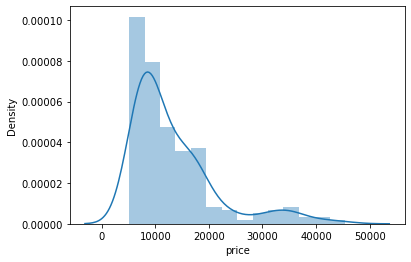

In [ ]:
sns.distplot(data['price'],kde=True)

* Price distribution plot is right skewed
* maximum number of cars are in range of 20000

# Price distribution of diesel vs gas car

C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of gases of diesel vehicles')

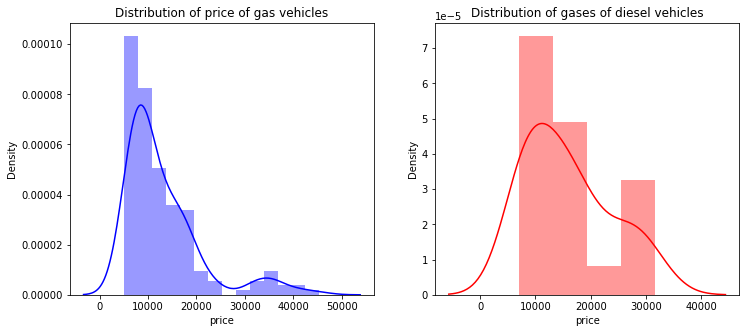

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(data[(data.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of gases of diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

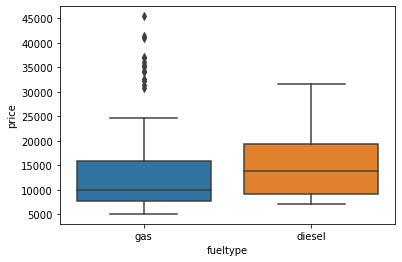

In [ ]:
sns.boxplot(x = 'fueltype', y = 'price', data = data)

* Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

# Price distribution of Std vs Turbo aspiration vehicles

C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

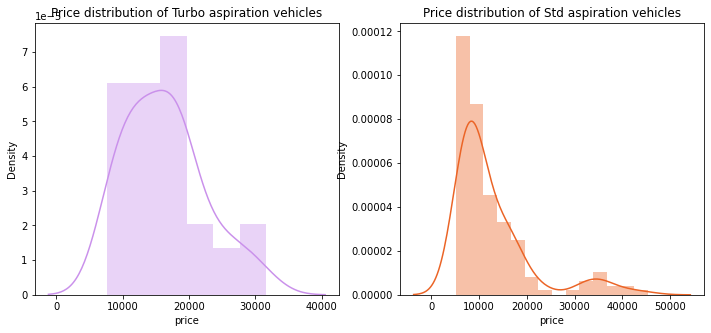

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.aspiration== 'turbo')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.aspiration == 'std')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')


<AxesSubplot:xlabel='aspiration', ylabel='price'>

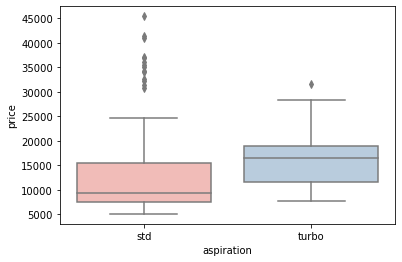

In [ ]:
sns.boxplot(x = 'aspiration', y = 'price', data = data,palette='Pastel1')

* Price of turbo is higher in compared to std , although there are some outliers in std price

# Symboling

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [ ]:
df=pd.DataFrame(data['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling','symboling':'count'})

<AxesSubplot:xlabel='symboling', ylabel='count'>

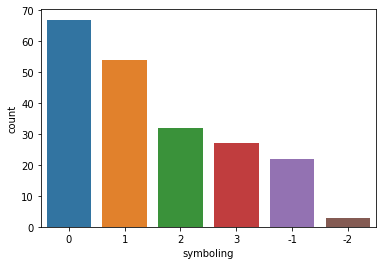

In [ ]:
sns.barplot(x='symboling',y='count',data=df)

* Most of the car symboling has 0 value

# Price distribution according to symboling¶

<AxesSubplot:xlabel='symboling', ylabel='price'>

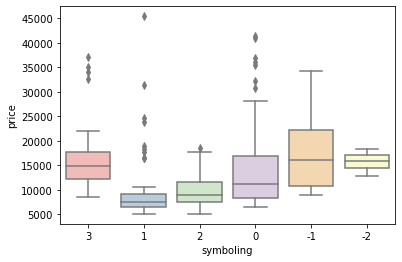

In [ ]:
sns.boxplot(x = 'symboling', y = 'price', data = data,palette='Pastel1')

* Price of -1 symboling is higher in compare to others

# Door number

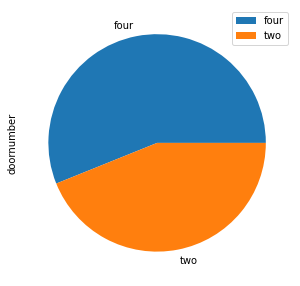

In [ ]:
df=pd.DataFrame(data['doornumber'].value_counts())
plot = df.plot.pie(y='doornumber', figsize=(5, 5))

* 115 cars has four dooors and 90 cars has 2 doors

# Price distribution according to door number

C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MANGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution of cars having four doors')

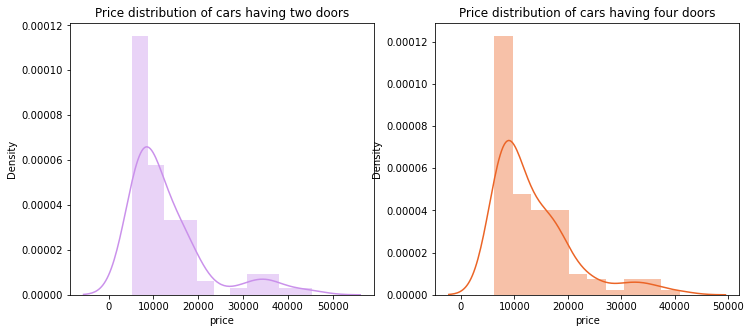

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
plot=sns.distplot(data[(data.doornumber== 'two')]["price"],color='#ca91eb',ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax=f.add_subplot(122)
plot=sns.distplot(data[(data.doornumber == 'four')]['price'],color='#eb6426',ax=ax)
ax.set_title('Price distribution of cars having four doors')


<AxesSubplot:xlabel='doornumber', ylabel='price'>

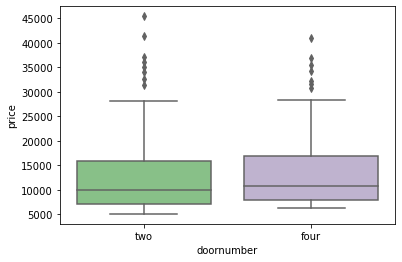

In [ ]:
sns.boxplot(x = 'doornumber', y = 'price', data = data,palette='Accent')

* As you can see there is slight difference in distributions of cars having two doors vs cars having 4 doors

# Carbody

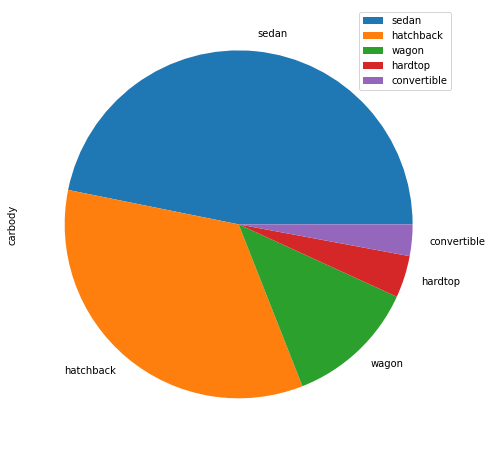

In [ ]:
df=pd.DataFrame(data['carbody'].value_counts())
plot = df.plot.pie(y='carbody', figsize=(8, 8))

* majority of car body are sedan and hatchback

# Price distribution according to car body

<AxesSubplot:xlabel='carbody', ylabel='price'>

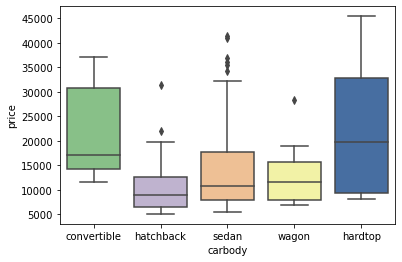

In [ ]:
sns.boxplot(x = 'carbody', y = 'price', data = data,palette='Accent')

* price of hardtop is very high compare to others

# Drive wheel

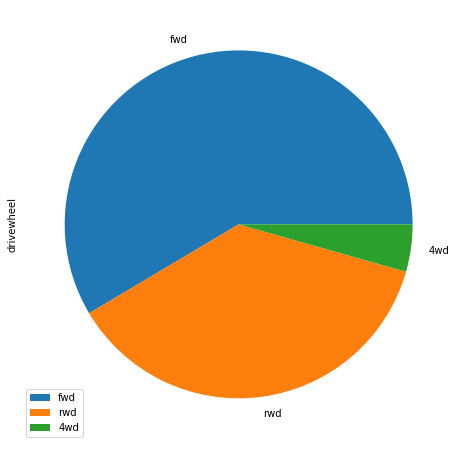

In [ ]:
df=pd.DataFrame(data['drivewheel'].value_counts())
plot = df.plot.pie(y='drivewheel', figsize=(8, 8))

* Maximum cars has fwd drive wheel

# Price distribution according to drive wheel

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

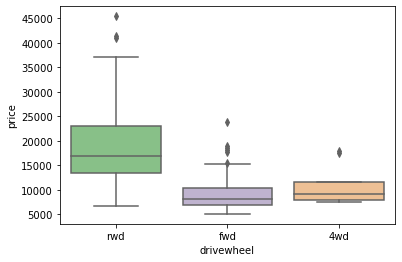

In [ ]:
sns.boxplot(x = 'drivewheel', y = 'price', data = data,palette='Accent')

* Price range of rwd drivewheel cars is quite high compare to others

# Engine location

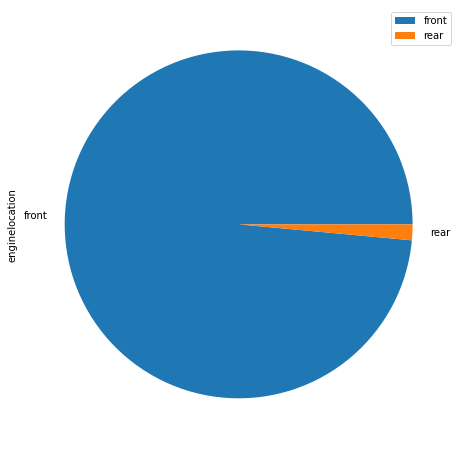

In [ ]:
df=pd.DataFrame(data['enginelocation'].value_counts())
plot = df.plot.pie(y='enginelocation', figsize=(8, 8))

* less number of cars having rear engine

# Engine type

In [ ]:
df=pd.DataFrame(data['enginetype'].value_counts())

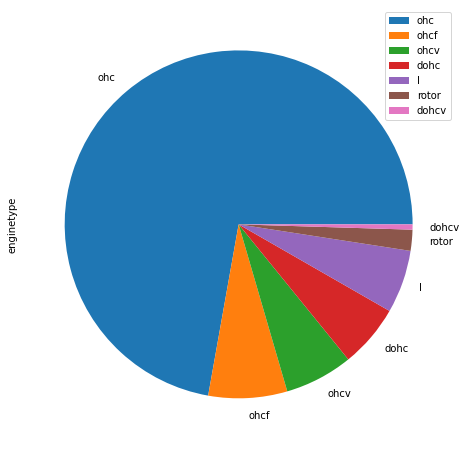

In [ ]:
plot = df.plot.pie(y='enginetype', figsize=(8, 8))

* Maximum number of engine type are of 'ohc'

<AxesSubplot:xlabel='enginetype', ylabel='price'>

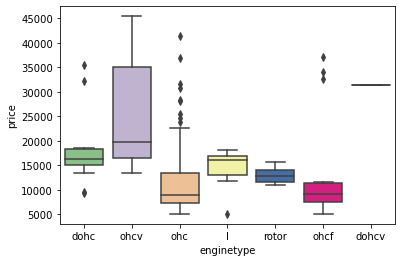

In [ ]:
sns.boxplot(x = 'enginetype', y = 'price', data = data,palette='Accent')

* price range of ohcv engine cars are quite high in compare to others

# Cylinder number

In [ ]:
df=pd.DataFrame(data['cylindernumber'].value_counts())

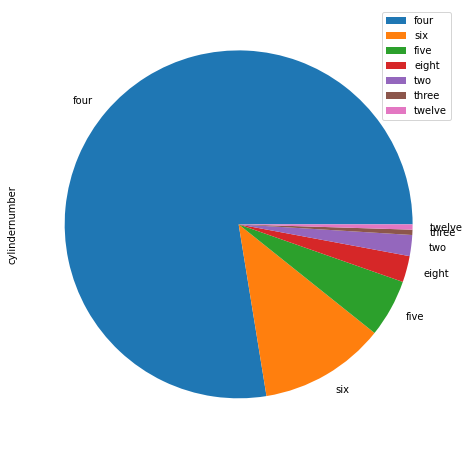

In [ ]:
plot = df.plot.pie(y='cylindernumber', figsize=(8, 8))

* maximum cars are of four cylinder number

# Price distribution according to cylinder number

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

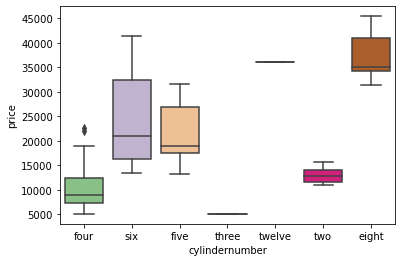

In [ ]:
sns.boxplot(x = 'cylindernumber', y = 'price', data = data,palette='Accent')

* there is only 1 car having cylinder number 3 and 12 .
* car having cylinder number eight has higher price range.

# Fuel system

In [ ]:
df=pd.DataFrame(data['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem','fuelsystem':'count'})

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

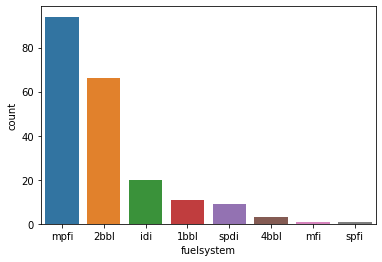

In [ ]:
sns.barplot(x='fuelsystem',y='count',data=df)

* most number of cars having fuel system mpfi
* least number of cars having fuel system mfi and spfi

# Price distribution according to fuel system

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

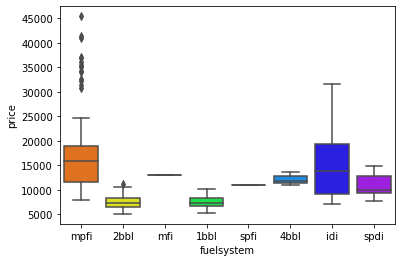

In [ ]:
sns.boxplot(x = 'fuelsystem', y = 'price', data = data,palette='gist_rainbow')

* price range are high of car having idi fuel system

# Wheel base Vs Price

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

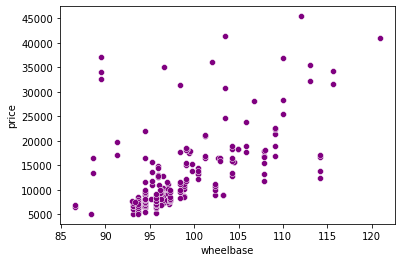

In [ ]:
sns.scatterplot(x="wheelbase", y="price", data=data,color='purple')

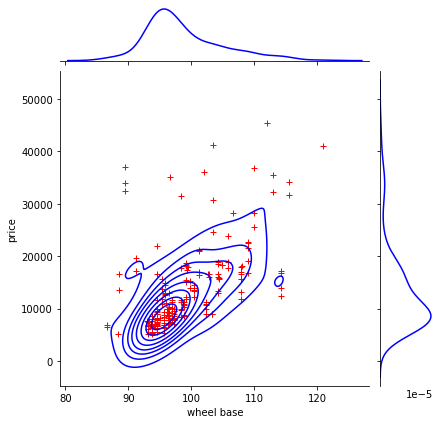

In [ ]:
g = sns.jointplot(x="wheelbase", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("wheel base", "price");

* Highly scattered points

# Carlength vs Car price

<AxesSubplot:xlabel='carlength', ylabel='price'>

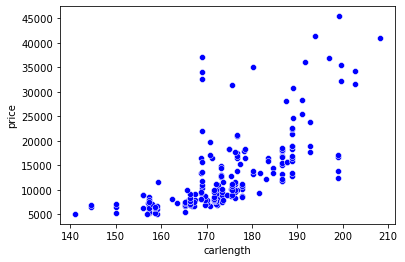

In [ ]:
sns.scatterplot(x="carlength", y="price", data=data,color='b')

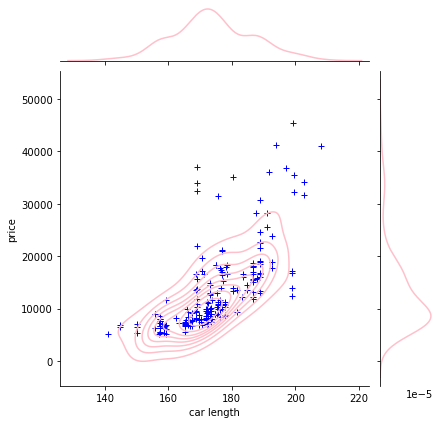

In [ ]:
g = sns.jointplot(x="carlength", y="price", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car length", "price");

* car length also scattered but less scattered than wheelbase

# Car width Vs Price

<AxesSubplot:xlabel='carwidth', ylabel='price'>

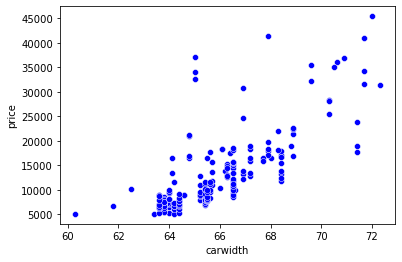

In [ ]:
sns.scatterplot(x="carwidth", y="price", data=data,color='b')

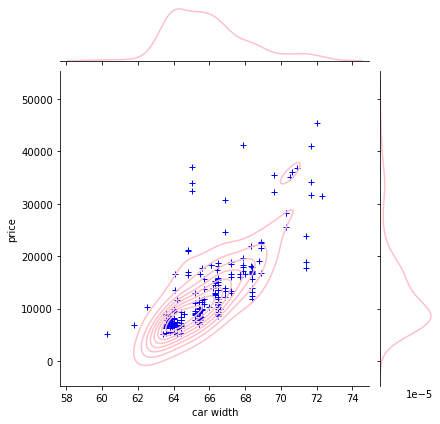

In [ ]:
g = sns.jointplot(x="carwidth", y="price", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "price");

# Car length vs Car width

<AxesSubplot:xlabel='carlength', ylabel='carwidth'>

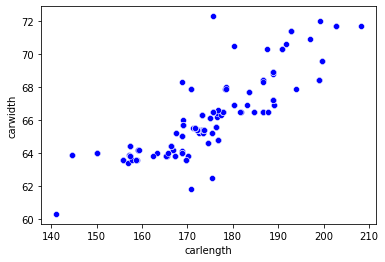

In [ ]:
sns.scatterplot(x="carlength", y="carwidth", data=data,color='b')

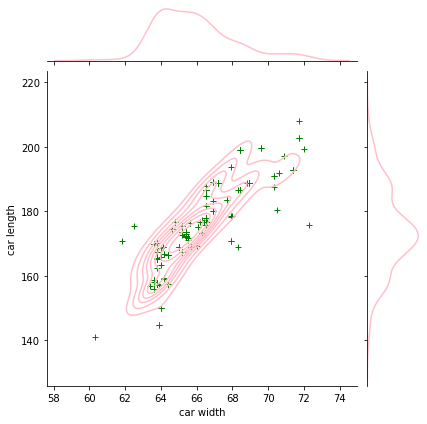

In [ ]:
g = sns.jointplot(x="carwidth", y="carlength", data=data, kind="kde", color="pink")
g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("car width", "car length");

* interesting !!! strong relation is seemed between car length and car width

# Curbweight vs Price

<AxesSubplot:xlabel='curbweight', ylabel='price'>

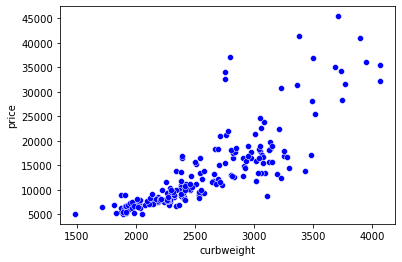

In [ ]:
sns.scatterplot(x="curbweight", y="price", data=data,color='b')

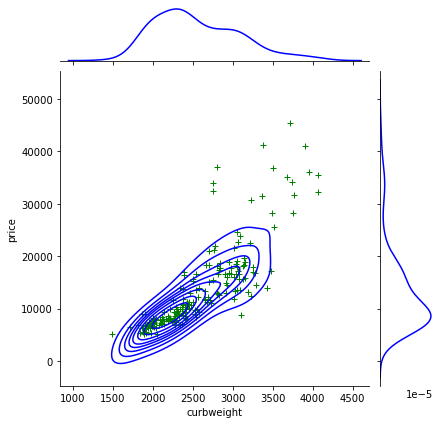

In [ ]:
g = sns.jointplot(x="curbweight", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("curbweight", "price");

* points are scattered after curbweight of 2900, initially it is increasing as curbweight increases as you can alse see in the joint plot.

# Engine size Vs Price

<AxesSubplot:xlabel='enginesize', ylabel='price'>

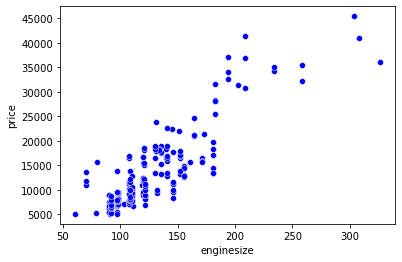

In [ ]:
sns.scatterplot(x="enginesize", y="price", data=data,color='b')

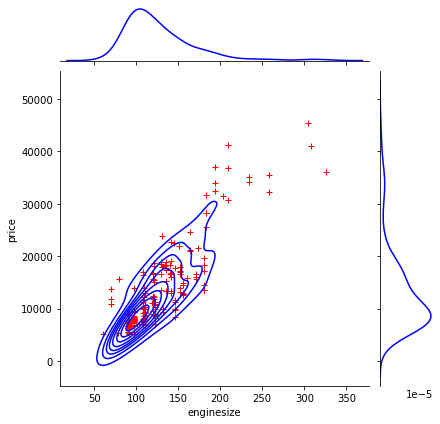

In [ ]:
g = sns.jointplot(x="enginesize", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("enginesize", "price");

* points are scattered after engine size of 140, initially it is increasing as curbweight increases as you can alse see in the joint plot.

# Stroke vs price

<AxesSubplot:xlabel='stroke', ylabel='price'>

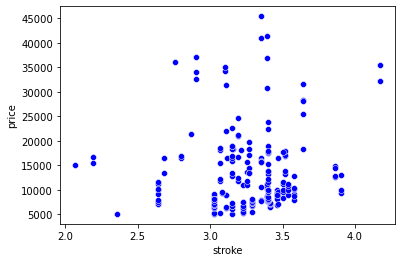

In [ ]:
sns.scatterplot(x="stroke", y="price", data=data,color='b')

* very weak correlation between stroke vs price

# Compression ratio vs Price

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

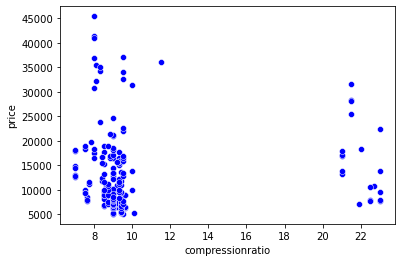

In [ ]:
sns.scatterplot(x="compressionratio", y="price", data=data,color='b')

* no relation between compression ratio and price

# Horsepower vs Price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

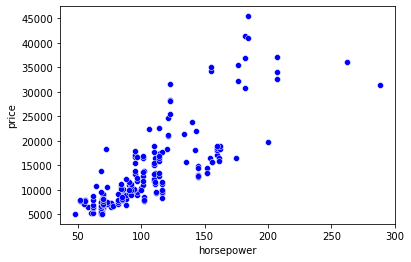

In [ ]:
sns.scatterplot(x="horsepower", y="price", data=data,color='b')

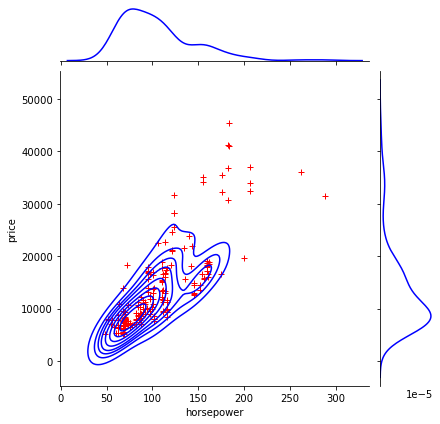

In [ ]:
g = sns.jointplot(x="horsepower", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("horsepower", "price");

# Peakrpm vs price

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

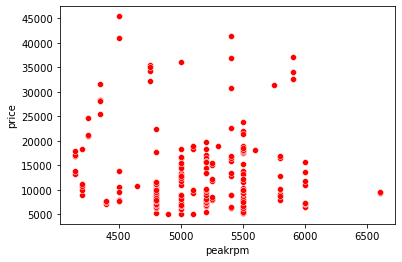

In [ ]:
sns.scatterplot(x="peakrpm", y="price", data=data,color='r')

* no correlation between peakrpm and price

# Citympg vs Price

<AxesSubplot:xlabel='citympg', ylabel='price'>

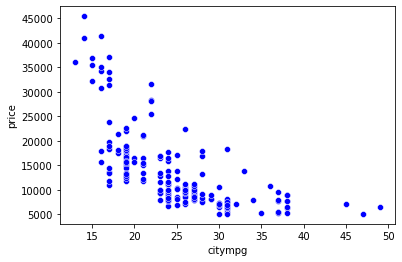

In [ ]:
sns.scatterplot(x="citympg", y="price", data=data,color='b')

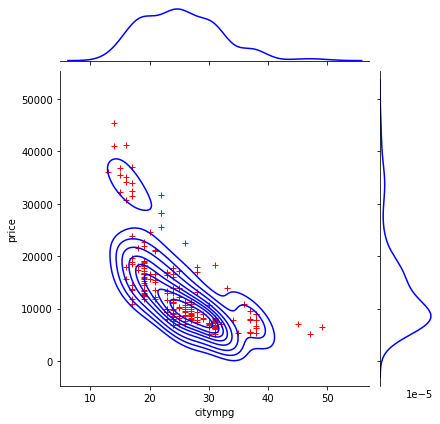

In [ ]:
g = sns.jointplot(x="citympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("citympg", "price");

* negative correlation is seen between citympg and price

# Highwaympg vs Price

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

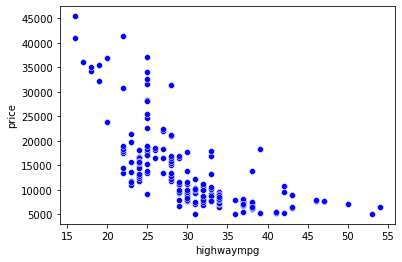

In [ ]:
sns.scatterplot(x="highwaympg", y="price", data=data,color='b')

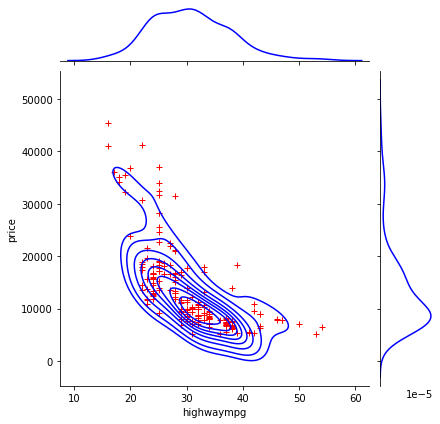

In [ ]:
g = sns.jointplot(x="highwaympg", y="price", data=data, kind="kde", color="b")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("highwaympg", "price");

* negative correlation between highwaympg and price

# Pairplot of all numerical features¶

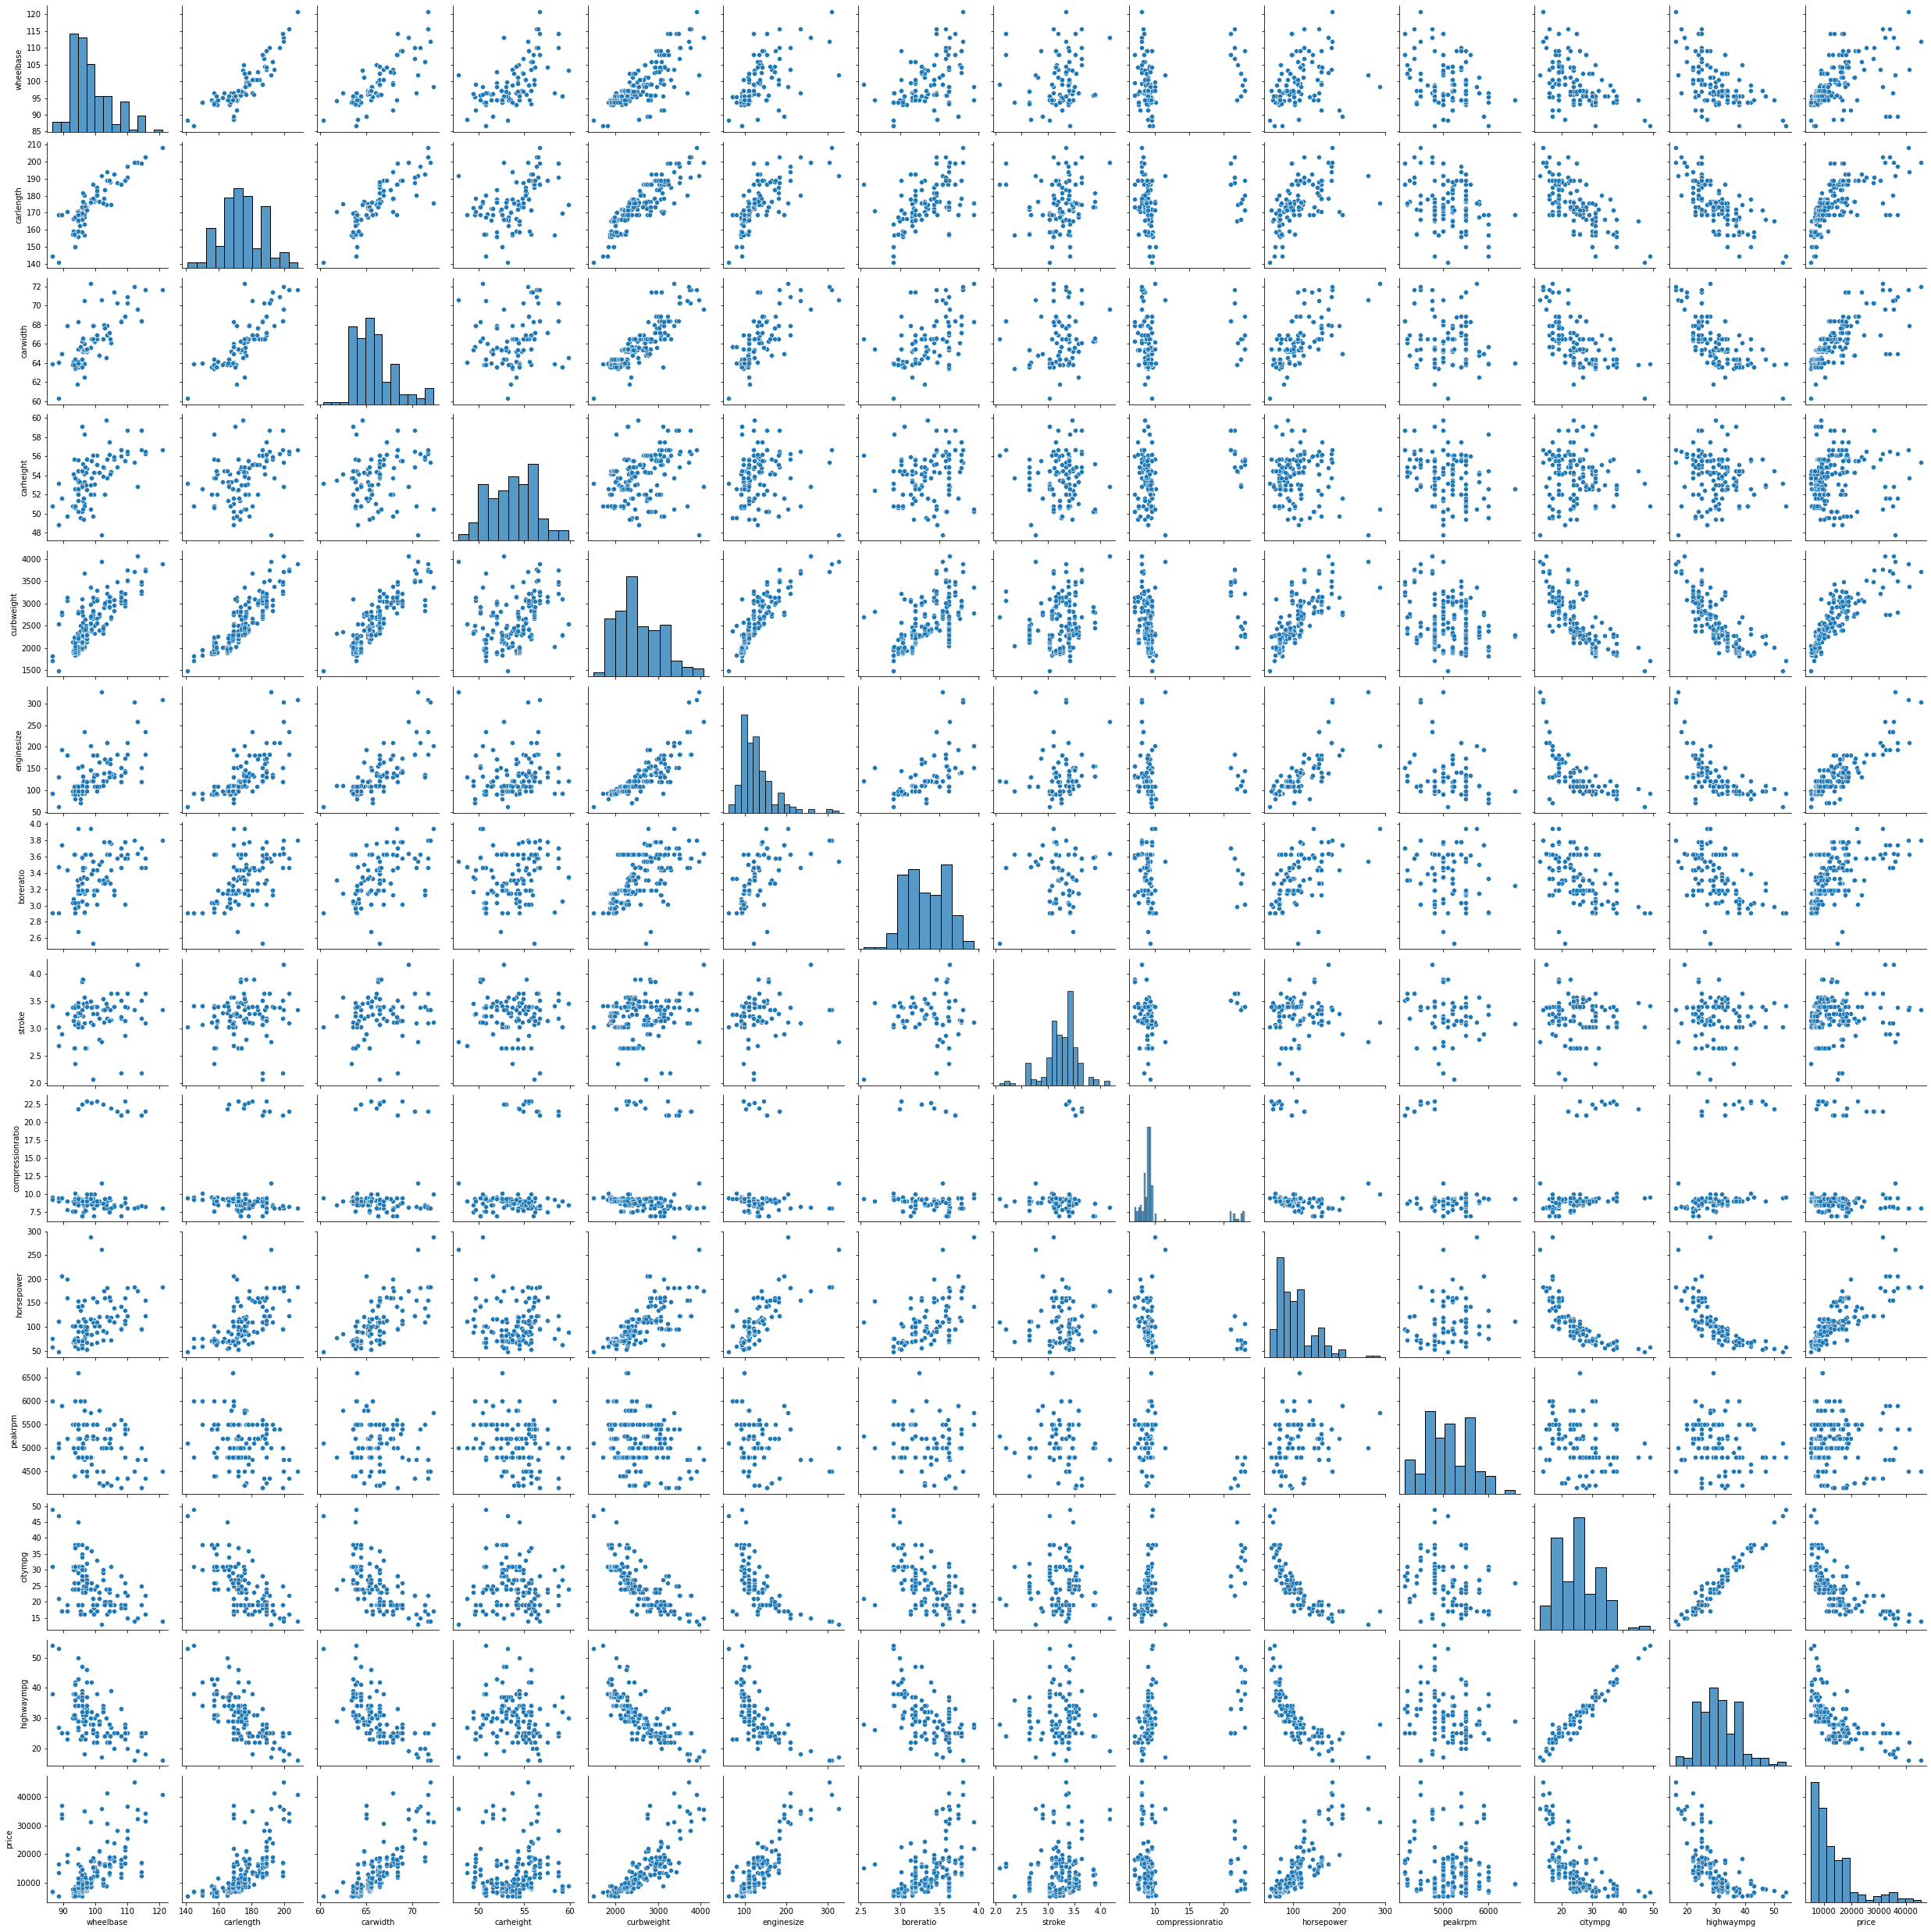

In [ ]:
ax = sns.pairplot(data[numerical_cols])

# Correlation matrix

In [ ]:
data[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

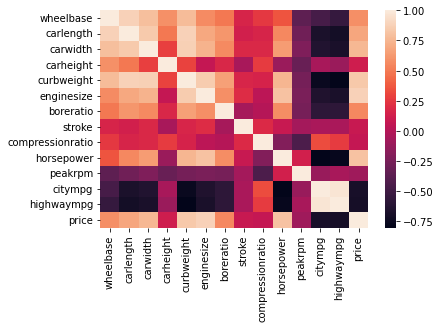

In [ ]:
sns.heatmap(data[numerical_cols].corr())

* wheelbase has high positive correlation with carlength,carwidth and curbweight
* carlength has high postive correlation with curbweight
* carlength has negative correlation with highwaympg
* carwidth has high postive correlation with curbweight and engine size
* enginesize has high positive correlation with horsepower
* curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
* horsepower has negative correlation with citympg and highwaympg
* citympg and highwaympg are highly correlated
* Scatter plot of wheelbase , carlen

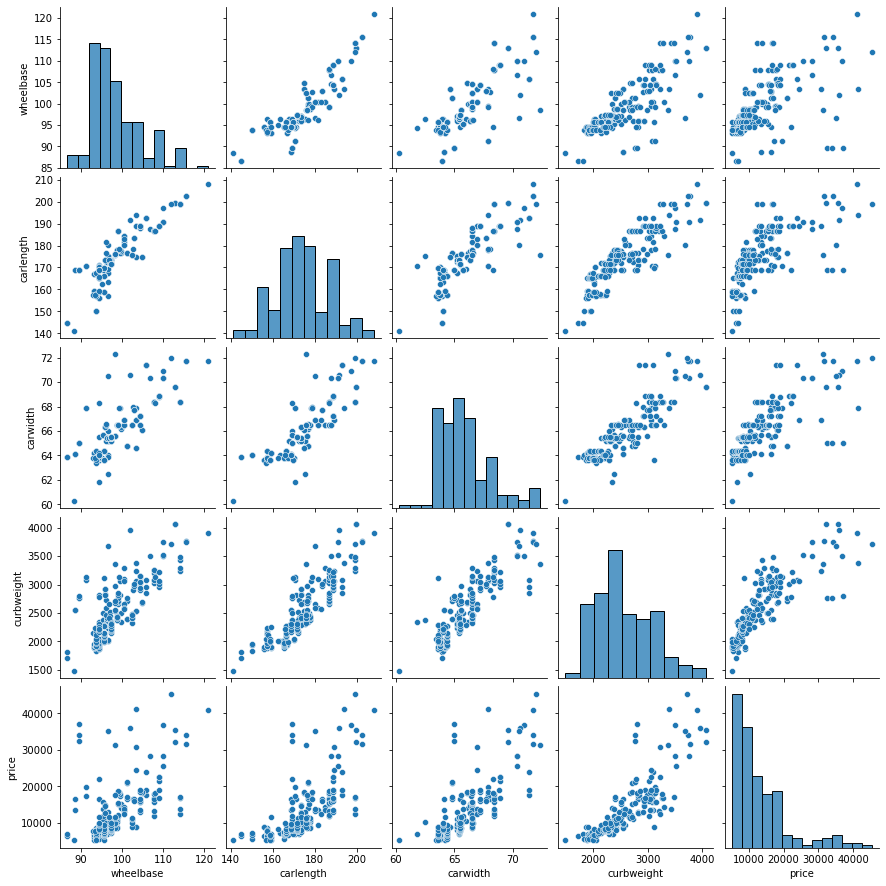

In [ ]:
col=['wheelbase','carlength','carwidth','curbweight','price']
sns.pairplot(data[col])

<AxesSubplot:>

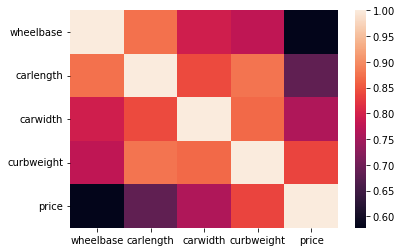

In [ ]:
sns.heatmap(data[col].corr())

# Scatter plot of carlength,curbweight,highwaympg with price

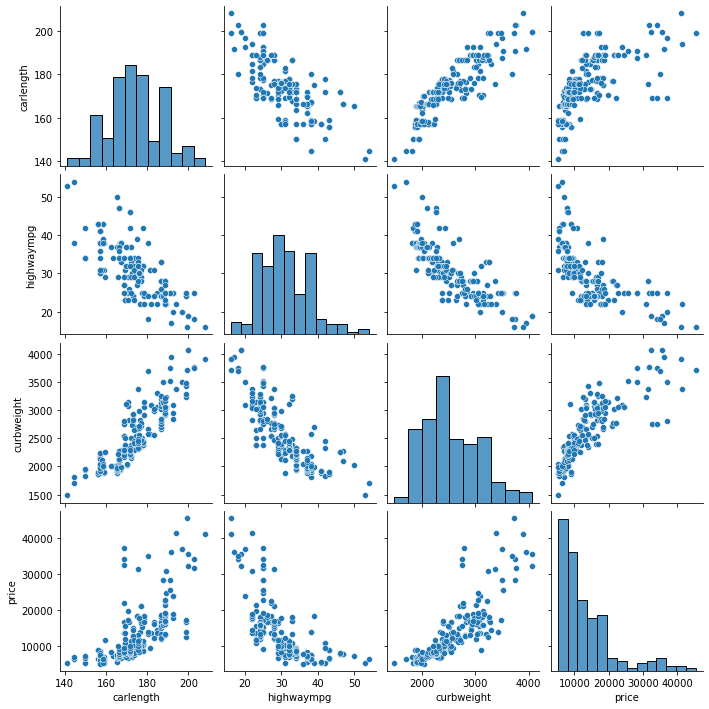

In [ ]:
col=['carlength','highwaympg','curbweight','price']
sns.pairplot(data[col])

<AxesSubplot:>

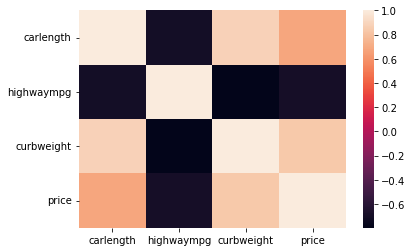

In [ ]:
sns.heatmap(data[col].corr())

# Scatter plot of carwidth,curbweight ,engine size and price

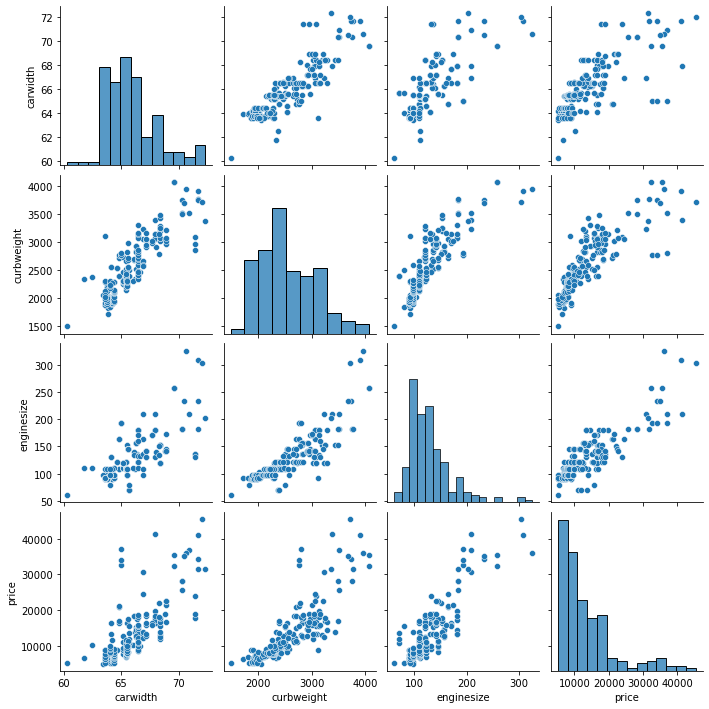

In [ ]:
col=['carwidth','curbweight','enginesize','price']
sns.pairplot(data[col])

<AxesSubplot:>

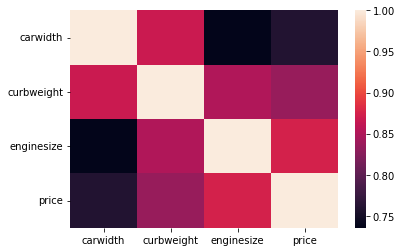

In [ ]:
sns.heatmap(data[col].corr())

# Scatter plot of curbweight ,engine size ,horse power,highwaympg and price

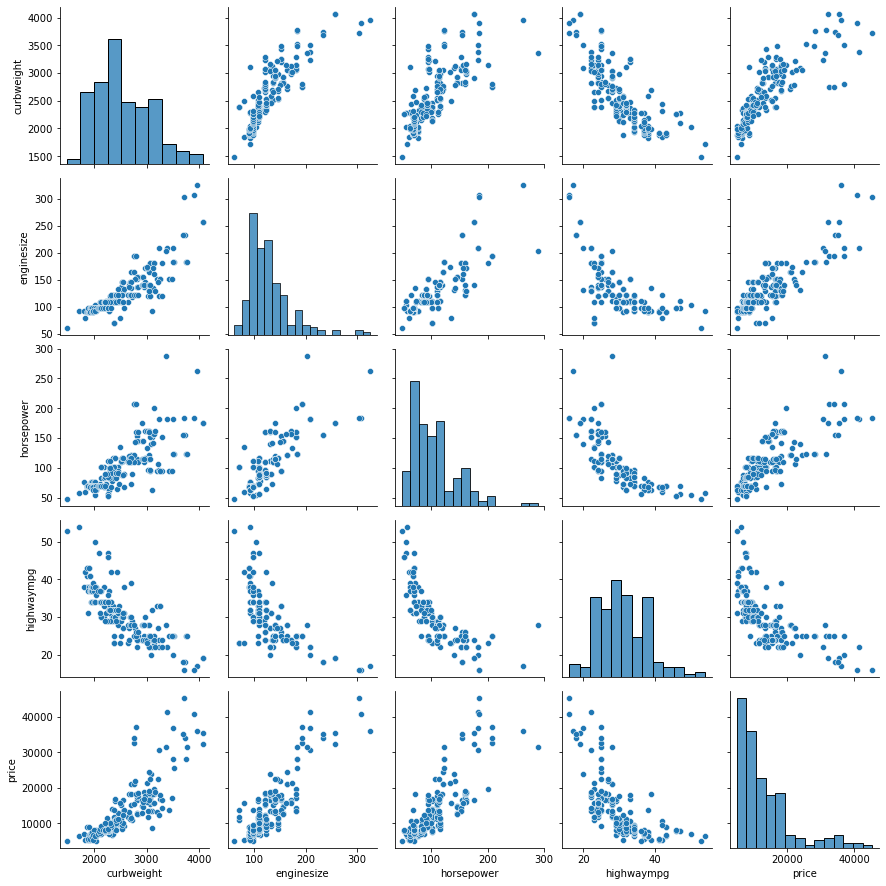

In [ ]:
col=['curbweight','enginesize','horsepower','highwaympg','price']
sns.pairplot(data[col])

<AxesSubplot:>

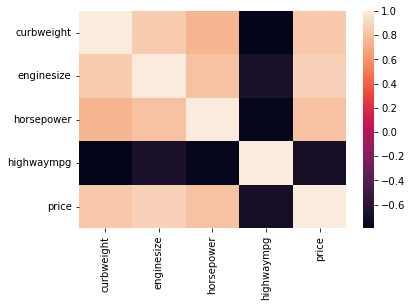

In [ ]:
sns.heatmap(data[col].corr())

# Horsepower,citympg , highway mpg and price

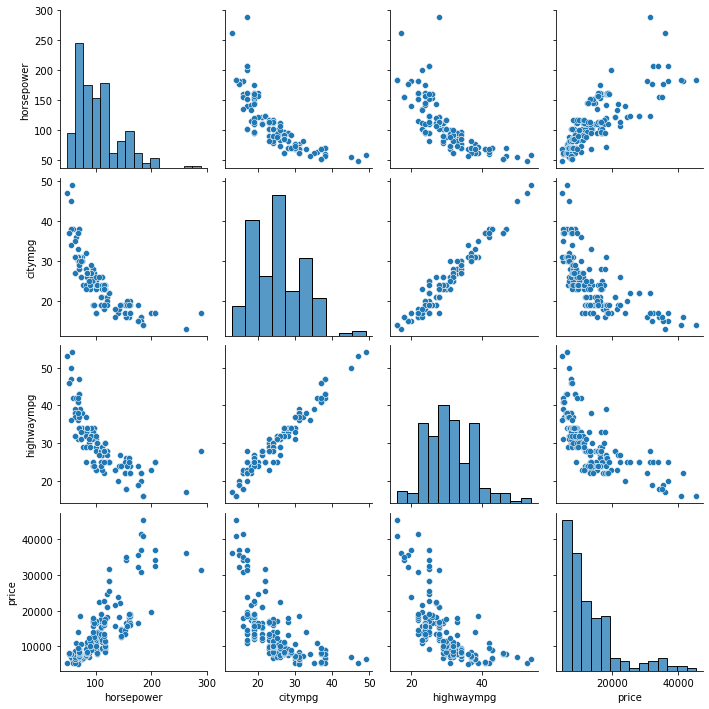

In [ ]:
col=['horsepower','citympg','highwaympg','price']
sns.pairplot(data[col])

<AxesSubplot:>

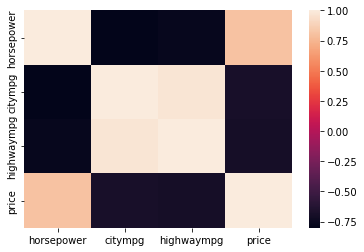

In [ ]:
sns.heatmap(data[col].corr())

# Horsepower Vs Car Body categorized by carbody

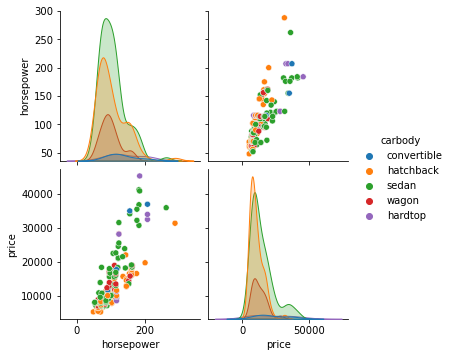

In [ ]:
sns.pairplot(data[['horsepower','price','carbody']], hue="carbody");

# Fitting all features with price

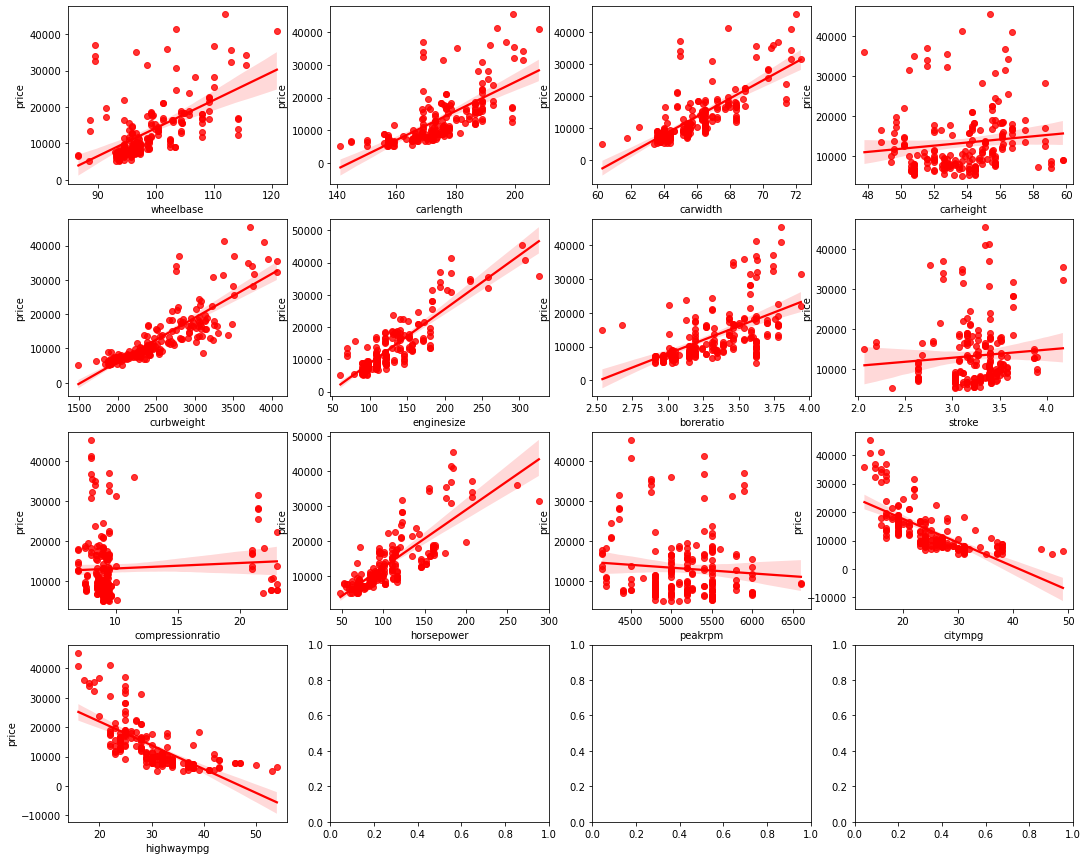

In [ ]:
fig,axes = plt.subplots(4,4,figsize=(18,15))
for seg,col in enumerate(numerical_cols[:len(numerical_cols)-1]):
    
    x,y = seg//4,seg%4
    sns.regplot(x=col, y='price' ,data=data,ax=axes[x][y],color='r')

# 3. Feature Selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [ ]:
X=data[numerical_cols].drop('price',axis=1)
y=data['price']

# Recursive feature elimination (RFE) with random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

In [ ]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=data['price']

In [ ]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [ ]:
features=list(X.columns[rfe.support_])

# 4. Data Modelling and Evaluation

In [ ]:
x = X[features]
y = data.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [ ]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.7299712173396138

# Decision Tree Regressor

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8699113195927972

# Random Forest regressor

In [ ]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9146935875209264

# Conclusion

* We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
* As we can see random forest performing best (with accuracy ~ 0.91)